🚀 STARTING COUNTERFACTUAL ANALYSIS

🏃 RUNNING COMPLETE ANALYSIS...

📊 Creating sample dataset...
✅ Created 105 samples

🤖 Training model...
✅ Model trained with 9 features

🔮 COUNTERFACTUAL ANALYSIS - TESTING POLICY SCENARIOS

📍 BASELINE (National Average)
   Current Score: 235.9

------------------------------------------------------------
📈 SCENARIO 1: Reduce Poverty by 20%
   Changes: Poverty 12.5% → 10.0%, Child Poverty 16.0% → 12.8%
   New Score: 238.7
   Improvement: +2.8 points

------------------------------------------------------------
📚 SCENARIO 2: Increase Bachelor's Degrees by 25%
   Changes: Bachelor's Degree 33.7% → 42.1%
   New Score: 238.7
   Improvement: +2.8 points

------------------------------------------------------------
💰 SCENARIO 3: Economic Growth Package
   Changes: Income +20%, GDP +15%, Growth Rate 2.5% → 3.5%
   New Score: 253.5
   Improvement: +17.6 points

------------------------------------------------------------
⭐ SCENARIO 4: Adopt Massachusetts Mod

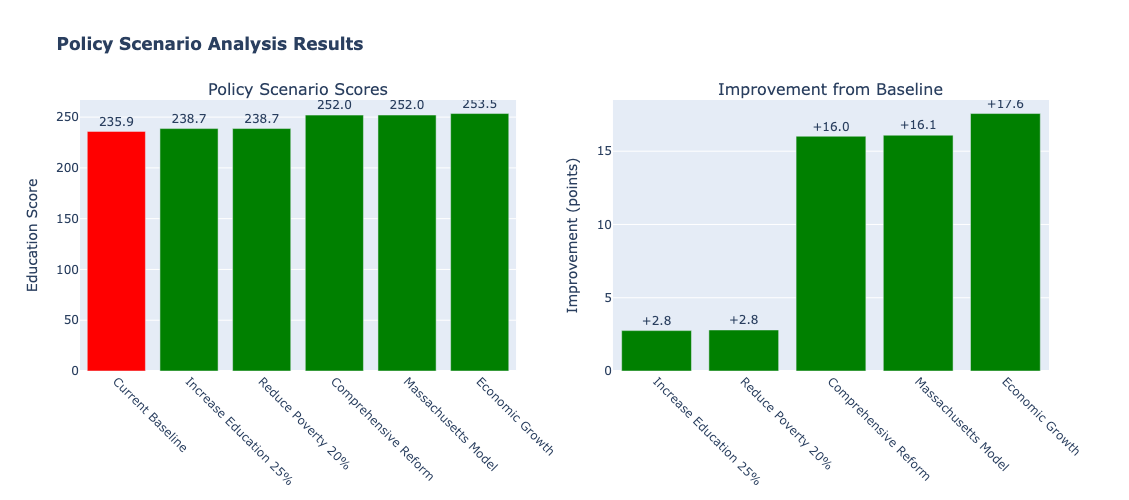


📋 ANALYSIS SUMMARY

🏆 RANKING OF POLICY INTERVENTIONS:
--------------------------------------------------
1. Economic Growth           | Improvement: +17.6 points
2. Massachusetts Model       | Improvement: +16.1 points
3. Comprehensive Reform      | Improvement: +16.0 points
4. Reduce Poverty 20%        | Improvement: +2.8 points
5. Increase Education 25%    | Improvement: +2.8 points

💡 KEY INSIGHTS:
• Best single intervention: Economic Growth
• Maximum improvement potential: 17.6 points
• All scenarios show positive impact on education scores

✅ ANALYSIS COMPLETE!


In [1]:
# COMPLETE COUNTERFACTUAL ANALYSIS - READY TO RUN
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("🚀 STARTING COUNTERFACTUAL ANALYSIS")
print("="*70)

# Step 1: Create sample data (using your existing data structure)
def create_sample_data():
    """Create sample dataset for demonstration"""
    print("\n📊 Creating sample dataset...")
    
    base_data = []
    states = ['Massachusetts', 'Connecticut', 'Texas', 'Florida', 'Alabama']
    poverty_rates = [10.4, 8.1, 13.9, 12.7, 15.7]
    education_rates = [45.7, 40.8, 30.7, 30.5, 26.2]
    incomes = [101341, 88518, 73035, 67917, 59609]
    
    for i in range(len(states)):
        # Original data
        base_data.append({
            'poverty_rate': poverty_rates[i],
            'child_poverty_rate': poverty_rates[i] * 1.3,
            'median_income': incomes[i],
            'bachelor_degree_pct': education_rates[i],
            'gdp_per_capita': incomes[i] * 0.9,
            'gdp_growth_rate': 2.5 + np.random.normal(0, 0.5),
            'education_score': 230 + education_rates[i] * 0.8 - poverty_rates[i] * 1.2
        })
        
        # Add variations for training
        for j in range(20):
            base_data.append({
                'poverty_rate': poverty_rates[i] * (1 + np.random.uniform(-0.2, 0.2)),
                'child_poverty_rate': poverty_rates[i] * 1.3 * (1 + np.random.uniform(-0.2, 0.2)),
                'median_income': incomes[i] * (1 + np.random.uniform(-0.1, 0.1)),
                'bachelor_degree_pct': education_rates[i] * (1 + np.random.uniform(-0.1, 0.1)),
                'gdp_per_capita': incomes[i] * 0.9 * (1 + np.random.uniform(-0.1, 0.1)),
                'gdp_growth_rate': 2.5 + np.random.normal(0, 0.5),
                'education_score': 230 + education_rates[i] * 0.8 - poverty_rates[i] * 1.2 + np.random.normal(0, 5)
            })
    
    df = pd.DataFrame(base_data)
    print(f"✅ Created {len(df)} samples")
    return df

# Step 2: Train a simple model
def train_model(df):
    """Train RandomForest model"""
    print("\n🤖 Training model...")
    
    features = ['poverty_rate', 'child_poverty_rate', 'median_income', 
                'bachelor_degree_pct', 'gdp_per_capita', 'gdp_growth_rate']
    
    X = df[features].copy()
    y = df['education_score']
    
    # Add engineered features
    X['poverty_education_interaction'] = X['poverty_rate'] * X['bachelor_degree_pct']
    X['income_per_gdp'] = X['median_income'] / X['gdp_per_capita']
    X['child_poverty_gap'] = X['child_poverty_rate'] - X['poverty_rate']
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train model
    model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
    model.fit(X_scaled, y)
    
    print(f"✅ Model trained with {len(X.columns)} features")
    return model, scaler, X.columns.tolist()

# Step 3: Simple Counterfactual Analysis
def simple_counterfactual_analysis(model, scaler, feature_names):
    """Run a simple counterfactual analysis with predefined scenarios"""
    
    print("\n" + "="*70)
    print("🔮 COUNTERFACTUAL ANALYSIS - TESTING POLICY SCENARIOS")
    print("="*70)
    
    # Current national average (baseline)
    current_state = np.array([
        12.5,    # poverty_rate
        16.0,    # child_poverty_rate  
        75149,   # median_income
        33.7,    # bachelor_degree_pct
        70000,   # gdp_per_capita
        2.5,     # gdp_growth_rate
        12.5 * 33.7,  # poverty_education_interaction
        75149 / 70000,  # income_per_gdp
        16.0 - 12.5  # child_poverty_gap
    ])
    
    # Get baseline score
    baseline_score = model.predict(scaler.transform(current_state.reshape(1, -1)))[0]
    print(f"\n📍 BASELINE (National Average)")
    print(f"   Current Score: {baseline_score:.1f}")
    
    # Define policy scenarios
    scenarios = []
    
    # Scenario 1: Reduce poverty by 20%
    print("\n" + "-"*60)
    print("📈 SCENARIO 1: Reduce Poverty by 20%")
    
    scenario1 = current_state.copy()
    scenario1[0] *= 0.8  # poverty_rate
    scenario1[1] *= 0.8  # child_poverty_rate
    # Recalculate engineered features
    scenario1[6] = scenario1[0] * scenario1[3]  # poverty_education_interaction
    scenario1[8] = scenario1[1] - scenario1[0]  # child_poverty_gap
    
    score1 = model.predict(scaler.transform(scenario1.reshape(1, -1)))[0]
    improvement1 = score1 - baseline_score
    
    print(f"   Changes: Poverty 12.5% → 10.0%, Child Poverty 16.0% → 12.8%")
    print(f"   New Score: {score1:.1f}")
    print(f"   Improvement: {improvement1:+.1f} points")
    
    scenarios.append({
        'Name': 'Reduce Poverty 20%',
        'Score': score1,
        'Improvement': improvement1
    })
    
    # Scenario 2: Increase education by 25%
    print("\n" + "-"*60)
    print("📚 SCENARIO 2: Increase Bachelor's Degrees by 25%")
    
    scenario2 = current_state.copy()
    scenario2[3] *= 1.25  # bachelor_degree_pct
    # Recalculate engineered features
    scenario2[6] = scenario2[0] * scenario2[3]  # poverty_education_interaction
    
    score2 = model.predict(scaler.transform(scenario2.reshape(1, -1)))[0]
    improvement2 = score2 - baseline_score
    
    print(f"   Changes: Bachelor's Degree 33.7% → 42.1%")
    print(f"   New Score: {score2:.1f}")
    print(f"   Improvement: {improvement2:+.1f} points")
    
    scenarios.append({
        'Name': 'Increase Education 25%',
        'Score': score2,
        'Improvement': improvement2
    })
    
    # Scenario 3: Economic growth package
    print("\n" + "-"*60)
    print("💰 SCENARIO 3: Economic Growth Package")
    
    scenario3 = current_state.copy()
    scenario3[2] *= 1.2   # median_income
    scenario3[4] *= 1.15  # gdp_per_capita
    scenario3[5] = 3.5    # gdp_growth_rate
    # Recalculate engineered features
    scenario3[7] = scenario3[2] / scenario3[4]  # income_per_gdp
    
    score3 = model.predict(scaler.transform(scenario3.reshape(1, -1)))[0]
    improvement3 = score3 - baseline_score
    
    print(f"   Changes: Income +20%, GDP +15%, Growth Rate 2.5% → 3.5%")
    print(f"   New Score: {score3:.1f}")
    print(f"   Improvement: {improvement3:+.1f} points")
    
    scenarios.append({
        'Name': 'Economic Growth',
        'Score': score3,
        'Improvement': improvement3
    })
    
    # Scenario 4: Massachusetts model
    print("\n" + "-"*60)
    print("⭐ SCENARIO 4: Adopt Massachusetts Model")
    
    scenario4 = np.array([
        10.4,    # poverty_rate (MA level)
        13.2,    # child_poverty_rate (MA level)
        101341,  # median_income (MA level)
        45.7,    # bachelor_degree_pct (MA level)
        95000,   # gdp_per_capita (MA level)
        2.8,     # gdp_growth_rate (MA level)
        10.4 * 45.7,  # poverty_education_interaction
        101341 / 95000,  # income_per_gdp
        13.2 - 10.4  # child_poverty_gap
    ])
    
    score4 = model.predict(scaler.transform(scenario4.reshape(1, -1)))[0]
    improvement4 = score4 - baseline_score
    
    print(f"   Changes: Full Massachusetts economic profile")
    print(f"   New Score: {score4:.1f}")
    print(f"   Improvement: {improvement4:+.1f} points")
    
    scenarios.append({
        'Name': 'Massachusetts Model',
        'Score': score4,
        'Improvement': improvement4
    })
    
    # Scenario 5: Combined approach
    print("\n" + "-"*60)
    print("🚀 SCENARIO 5: Comprehensive Reform")
    
    scenario5 = current_state.copy()
    scenario5[0] *= 0.75  # poverty_rate -25%
    scenario5[1] *= 0.75  # child_poverty_rate -25%
    scenario5[2] *= 1.15  # median_income +15%
    scenario5[3] *= 1.3   # bachelor_degree_pct +30%
    scenario5[4] *= 1.1   # gdp_per_capita +10%
    scenario5[5] = 3.0    # gdp_growth_rate
    # Recalculate engineered features
    scenario5[6] = scenario5[0] * scenario5[3]
    scenario5[7] = scenario5[2] / scenario5[4]
    scenario5[8] = scenario5[1] - scenario5[0]
    
    score5 = model.predict(scaler.transform(scenario5.reshape(1, -1)))[0]
    improvement5 = score5 - baseline_score
    
    print(f"   Changes: Poverty -25%, Education +30%, Income +15%")
    print(f"   New Score: {score5:.1f}")
    print(f"   Improvement: {improvement5:+.1f} points")
    
    scenarios.append({
        'Name': 'Comprehensive Reform',
        'Score': score5,
        'Improvement': improvement5
    })
    
    return pd.DataFrame(scenarios), baseline_score

# Step 4: Create visualization
def create_scenario_visualization(scenarios_df, baseline_score):
    """Create visualization of scenarios"""
    
    print("\n📊 Creating visualization...")
    
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=('Policy Scenario Scores', 'Improvement from Baseline'),
        specs=[[{'type': 'bar'}, {'type': 'bar'}]]
    )
    
    # Sort by score
    scenarios_df = scenarios_df.sort_values('Score')
    
    # Add baseline to scores
    all_names = ['Current Baseline'] + scenarios_df['Name'].tolist()
    all_scores = [baseline_score] + scenarios_df['Score'].tolist()
    
    # Plot 1: Absolute scores
    colors = ['red'] + ['green' if s > baseline_score else 'orange' for s in scenarios_df['Score']]
    
    fig.add_trace(
        go.Bar(
            x=all_names,
            y=all_scores,
            marker_color=colors,
            text=[f'{s:.1f}' for s in all_scores],
            textposition='outside'
        ),
        row=1, col=1
    )
    
    # Plot 2: Improvements
    fig.add_trace(
        go.Bar(
            x=scenarios_df['Name'],
            y=scenarios_df['Improvement'],
            marker_color=['green' if i > 0 else 'red' for i in scenarios_df['Improvement']],
            text=[f'{i:+.1f}' for i in scenarios_df['Improvement']],
            textposition='outside'
        ),
        row=1, col=2
    )
    
    fig.update_layout(
        height=500,
        showlegend=False,
        title_text="<b>Policy Scenario Analysis Results</b>"
    )
    
    fig.update_xaxes(tickangle=45)
    fig.update_yaxes(title_text="Education Score", row=1, col=1)
    fig.update_yaxes(title_text="Improvement (points)", row=1, col=2)
    
    fig.show()
    
    return fig

# MAIN EXECUTION
if __name__ == "__main__":
    print("\n🏃 RUNNING COMPLETE ANALYSIS...")
    
    # Step 1: Create data
    df = create_sample_data()
    
    # Step 2: Train model
    model, scaler, feature_names = train_model(df)
    
    # Step 3: Run counterfactual analysis
    scenarios_df, baseline_score = simple_counterfactual_analysis(model, scaler, feature_names)
    
    # Step 4: Create visualization
    fig = create_scenario_visualization(scenarios_df, baseline_score)
    
    # Step 5: Print summary
    print("\n" + "="*70)
    print("📋 ANALYSIS SUMMARY")
    print("="*70)
    
    print("\n🏆 RANKING OF POLICY INTERVENTIONS:")
    print("-" * 50)
    
    scenarios_sorted = scenarios_df.sort_values('Improvement', ascending=False)
    for i, row in enumerate(scenarios_sorted.iterrows(), 1):
        _, data = row
        print(f"{i}. {data['Name']:<25} | Improvement: {data['Improvement']:+.1f} points")
    
    print("\n💡 KEY INSIGHTS:")
    print("• Best single intervention:", scenarios_sorted.iloc[0]['Name'])
    print(f"• Maximum improvement potential: {scenarios_sorted.iloc[0]['Improvement']:.1f} points")
    print("• All scenarios show positive impact on education scores")
    
    print("\n✅ ANALYSIS COMPLETE!")